# Work with transformations in a notebook



In [3]:

import importlib # needed so that we can reload packages
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

# add SISEPUEDE to path
dir_py = pathlib.Path(os.path.realpath(".")).parents[1]
if str(dir_py) not in sys.path:
    sys.path.append(str(dir_py))

    
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
import sisepuede.transformers as trf


# Transformations: what are they?

Transformations are well-defined in the SISEPUEDE ecosystem. A ``Transformation`` is a parameterization of a``Transformer``. Both are classes in SISEPUEDE, with ``Transformations`` and ``Transformers`` acting as collections of these classes, respectively. Each ``Transformer`` class is a function that modifies trajectories to reflect policy outcomes; documentation for each of the 60+ functions is available on readthedocs. 

``Transformation`` objects allow users to define parameterizations of ``Transformer`` objects using configuration files in a directory. This directory contains a configuration for:

1. All transformations
1. General configuraiton and information on the baseline
1. The strategy definition file, which combines transformations



See sisepuede.readthedocs.io for more information on transformations, transformers, and strategies.



# Let's explore the objects that underly all transformations: ``Transformers``

In [4]:
?trf.Transformers

Init signature:
trf.Transformers(
    dict_config: Dict,
    code_baseline: str = 'TFR:BASE',
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    field_region: Optional[str] = None,
    logger: Optional[logging.Logger] = None,
    regex_code_structure: re.Pattern = re.compile('TFR:(\\D*):(.*$)'),
    regex_template_prepend: str = 'sisepuede_run',
    **kwargs,
)
Docstring:     
Build collection of Transformers that are used to define transformations.

Includes some information on

Initialization Arguments
------------------------
- dict_config: configuration dictionary used to pass parameters to 
    transformations. See ?TransformerEnergy._initialize_parameters() for
    more information on requirements.
- dir_jl: location of Julia directory containing Julia environment and 
    support modules
- fp_nemomod_reference_files: directory housing reference files called by
    NemoMod when running electricity model. Required to access data in 
    EnergyProduction. Needs the fol

#  Let's get available `Transformers`

##  `Transformers` requires an input data frame to transform; this data frame should be a set of raw SISEPUEDE inputs
- Use `SISEPUEDEExamples()` to pull example data; examples are listed in `SISEPUEDEExamples.all_examples`

In [5]:
examples = SISEPUEDEExamples()
df_input = examples("input_data_frame")


##  We can build the `Transformers` class now

In [6]:
transformers = trf.Transformers(
    {},
    df_input = df_input,
)



###  `Transformers` allows you to access all `Transformer` objects
- A `Transformer` is akin to a lever in the XLRM framework
- Each `Transformer` is associated with a variable (or set of variables) that represent a feasible, literature-based change in outcome due to at least one intervention(s)
- The list of available `Transformer` classes is available in `Transformers.all_transformers`
- Get a transformer using `Transformers.get_transformer`

In [16]:
transformers.all_transformers

['TFR:AGRC:DEC_CH4_RICE',
 'TFR:AGRC:DEC_EXPORTS',
 'TFR:AGRC:DEC_LOSSES_SUPPLY_CHAIN',
 'TFR:AGRC:INC_CONSERVATION_AGRICULTURE',
 'TFR:AGRC:INC_PRODUCTIVITY',
 'TFR:BASE',
 'TFR:CCSQ:INC_CAPTURE',
 'TFR:ENTC:DEC_LOSSES',
 'TFR:ENTC:LEAST_COST_SOLUTION',
 'TFR:ENTC:TARGET_CLEAN_HYDROGEN',
 'TFR:ENTC:TARGET_RENEWABLE_ELEC',
 'TFR:FGTV:DEC_LEAKS',
 'TFR:FGTV:INC_FLARE',
 'TFR:INEN:INC_EFFICIENCY_ENERGY',
 'TFR:INEN:INC_EFFICIENCY_PRODUCTION',
 'TFR:INEN:SHIFT_FUEL_HEAT',
 'TFR:IPPU:DEC_CLINKER',
 'TFR:IPPU:DEC_DEMAND',
 'TFR:IPPU:DEC_HFCS',
 'TFR:IPPU:DEC_N2O',
 'TFR:IPPU:DEC_OTHER_FCS',
 'TFR:IPPU:DEC_PFCS',
 'TFR:LNDU:DEC_DEFORESTATION',
 'TFR:LNDU:DEC_SOC_LOSS_PASTURES',
 'TFR:LNDU:INC_REFORESTATION',
 'TFR:LNDU:INC_SILVOPASTURE',
 'TFR:LNDU:PLUR',
 'TFR:LSMM:INC_CAPTURE_BIOGAS',
 'TFR:LSMM:INC_MANAGEMENT_CATTLE_PIGS',
 'TFR:LSMM:INC_MANAGEMENT_OTHER',
 'TFR:LSMM:INC_MANAGEMENT_POULTRY',
 'TFR:LVST:DEC_ENTERIC_FERMENTATION',
 'TFR:LVST:DEC_EXPORTS',
 'TFR:LVST:INC_PRODUCTIVITY',
 'TFR

###  A `Transformer` is callable
- When you get it, you can call it
- When called, it will generate a dataframe that is transformed under default parameters associated with each Transformer

In [19]:
tr_medium_duty = transformers.get_transformer("TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY")

# you can call it 
tr_medium_duty()

,region,time_period,avgload_trns_freight_tonne_per_vehicle_aviation,avgload_trns_freight_tonne_per_vehicle_rail_freight,avgload_trns_freight_tonne_per_vehicle_road_heavy_freight,avgload_trns_freight_tonne_per_vehicle_water_borne,avgmass_lvst_animal_buffalo_kg,avgmass_lvst_animal_cattle_dairy_kg,avgmass_lvst_animal_cattle_nondairy_kg,avgmass_lvst_animal_chickens_kg,...,ef_ippu_tonne_cf4_per_tonne_production_electronics,ef_ippu_tonne_cf4_per_tonne_production_metals,ef_ippu_tonne_c3f8_per_tonne_production_chemicals,ef_ippu_tonne_c3f8_per_tonne_production_electronics,ef_ippu_tonne_c4f10_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c4f10_per_tonne_production_chemicals,ef_ippu_tonne_c6f14_per_mmm_gdp_product_use_ods_other,ef_ippu_tonne_c6f14_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_chemicals,ef_ippu_tonne_cc4f8_per_tonne_production_electronics
0,costa_rica,0,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,4.204879e-07,0.0,1.515048e-07,0.0,0.0,0.0,0.0,0.0,5.669821e-08
1,costa_rica,1,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.134675e-07,0.0,1.313925e-07,0.0,0.0,0.0,0.0,0.0,5.185820e-08
2,costa_rica,2,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,1.821067e-07,0.0,1.060066e-07,0.0,0.0,0.0,0.0,0.0,5.269348e-08
3,costa_rica,3,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,2.094712e-07,0.0,1.093024e-07,0.0,0.0,0.0,0.0,0.0,5.500450e-08
4,costa_rica,4,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.446161e-07,0.0,1.046451e-07,0.0,0.0,0.0,0.0,0.0,5.266081e-08
5,costa_rica,5,70.0,2923.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.490918e-07,0.0,9.832546e-08,0.0,0.0,0.0,0.0,0.0,4.948055e-08
6,costa_rica,6,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
7,costa_rica,7,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
8,costa_rica,8,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08
9,costa_rica,9,70.0,4082.0,31.751466,6468.0,322.900664,520.741388,310.599686,1.12759,...,0.000002,3.155090e-07,0.0,1.105930e-07,0.0,0.0,0.0,0.0,0.0,5.257225e-08


###  A `Transfomer` is parameterized using keyword arguments
- No need to pass `df_input` unless you want to apply it to a data frame not used to instantiation the `Transformers` collection
- However, other arguments can be varied
- Full documentation of all `Transformer` functions is available at the [SISEPUEDE readthedocs](https://sisepuede.readthedocs.io/en/latest/transformers.html)
- Let's look at the doc string of `tr_medium_duty.function`, the base function in the transformer that we called (can also use `?tr_medium_duty`, but it will not show the signature)
    - `categories` can be varied to any TRNS category
    - `dict_allocation_fuels_target` is used to allocate the magnitude of the fuel shift across target fuels; 
        - `dict_allocation_fuels_target = {"fuel_electricity": 1.0}` means that 100% of the magnitude will be shifted away from `fuels_source`to electricity
    - `fuels_source` give fuels that are shifted away from. By default, this `Transformer` only shifts away from diesel and gas
    - `magnitude`: fraction of source fuel mix that is shifted to fuels specified in `dict_allocation_fuels_target`
    - `vec_implementation_ramp`: the implementation ramp vector. See discussion below for more information on how this can be specified

In [22]:
?tr_medium_duty.function


Signature:
tr_medium_duty.function(
    categories: List[str] = ['road_heavy_freight', 'road_heavy_regional', 'public'],
    dict_allocation_fuels_target: Optional[dict] = None,
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    fuels_source: List[str] = ['fuel_diesel', 'fuel_gasoline'],
    magnitude: float = 0.7,
    strat: Optional[int] = None,
    vec_implementation_ramp: Optional[numpy.ndarray] = None,
) -> pandas.core.frame.DataFrame
Docstring:
Implement the "Fuel-Switch Medium Duty" TRNS transformation on input 
    DataFrame df_input. By default, transfers mangitude to electricity 
    from gasoline and diesel; e.g., with magnitude = 0.7, then 70% of 
    diesel and gas demand are transfered to fuels in fuels_target. The 
    rest of the fuel demand is then transferred to hydrogen. 


Function Arguments
------------------

Keyword Arguments
-----------------
- catgories: TRNS categories to apply to. Defaults to 
    [
        "road_heavy_freight", 
        "road_he

###  Let's examine a `Transformation`

- A `Transformation` is a parameterization of a `Transformer`
- Let's look at fuel shifting medium-duty 

In [14]:
dict_setup = {
    "citations": ["xyz", "xbm"],
    "identifiers": {"transformation_code": "TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY",
    "transformation_name": "Shift fuel for medium duty vehicles"},
    "description": "blah blah blah",
    "parameters": {
        "categories": [
            "road_heavy_freight",
            "road_heavy_regional",
            "public"
        ],
        "dict_allocation_fuels_target": None,
        "fuels_source": [
            "fuel_diesel", 
            "fuel_gasoline"
        ],
        "magnitude": 0.3,
        "vec_implementation_ramp": {
            "alpha_logistic": 0,
            "n_tp_ramp": None,
            "tp_0_ramp": 5,
            "window_logistic": [-8, 8]
        }
    },
    "transformer": "TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY"
}

In [15]:
trf.Transformation(
    dict_setup,
    transformers,
)

<AxesSubplot: >

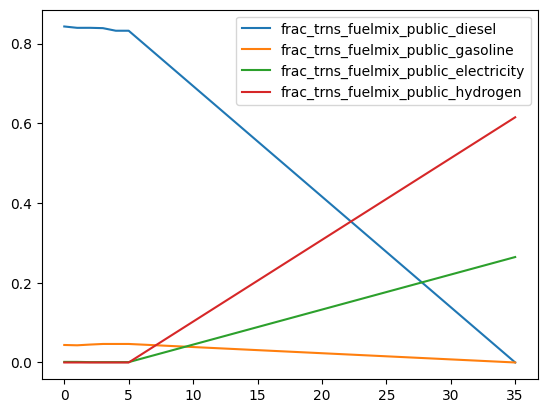

In [10]:
mat = transformers.model_attributes

transformation = trf.Transformation(
    "/Users/jsyme/Desktop/trf_testing/transformation_trname_here.yaml",
    transformers,
)


tr_cur = transformers.get_transformer(transformation.transformer_code)
df = tr_cur()

cats = ["public"] # road_heavy_regional
fields = mat.build_variable_fields(
    "Transportation Mode Fuel Fraction Diesel",
    restrict_to_category_values = cats,
)

fields += mat.build_variable_fields(
    "Transportation Mode Fuel Fraction Gasoline",
    restrict_to_category_values = cats,
)


fields += mat.build_variable_fields(
    "Transportation Mode Fuel Fraction Electricity",
    restrict_to_category_values = cats,
)
[]
fields += mat.build_variable_fields(
    "Transportation Mode Fuel Fraction Hydrogen",
    restrict_to_category_values = cats,

)


#transformation.dict_parameters
df_tmp = transformation.function()
df_tmp[fields].plot()

In [12]:
transformation.config.dict_yaml

{'citations': ['xyz', 'xbm'],
 'identifiers': {'transformation_code': 'TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY',
  'transformation_name': 'Shift fuel for medium duty vehicles'},
 'description': 'blah blah blah',
 'parameters': {'categories': ['road_heavy_freight',
   'road_heavy_regional',
   'public'],
  'dict_allocation_fuels_target': None,
  'fuels_source': ['fuel_diesel', 'fuel_gasoline'],
  'magnitude': 0.3,
  'vec_implementation_ramp': {'alpha_logistic': 0,
   'n_tp_ramp': None,
   'tp_0_ramp': 5,
   'window_logistic': [-8, 8]}},
 'transformer': 'TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY'}

# We can then load transformations here

In [ ]:


transformations = trn.Transformations(
    "/Users/jsyme/Desktop/trf_testing/",
    transformers = transformers,
)
transformations.attribute_transformation




In [ ]:
# explore transformations
trb = transformations.get_transformation("TX:BASE")


# Next, let's build some individual strategies

In [ ]:



strat = st.Strategy(
    0,
    None,
    transformations,
)


strat1 = st.Strategy(
    1,
    "TX:LSMM:MANAGE_CATTLE_MANURE|TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY",
    transformations,
)



In [ ]:

t0 = time.time()
strats = st.Strategies(
    transformations,
    export_path = pathlib.Path("/Users/jsyme/Desktop/tr_test_templates"),#"transformations",
    prebuild = True,
)
t1 = time.time()

##  Initialize the SISEPUEDE class to get data from existing templates
- see ``?SISEPUEDE`` for more information on initialization arguments
- You can initialize as a dummy to avoid marginal setup time for Julia, but we may want to run with it at some point

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    #n_futures = 100,
    regions = ["peru"],
    try_exogenous_xl_types_in_variable_specification = True,
)

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-05-20 12:02:29,595 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-05-20 12:02:29,598 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-05-20 12:02:29,599 - INFO - 	Setting export engine to 'sqlite'.
2024-05-20 12:02:29,624 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-05-20 12:02:29,625 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-05-20 12:02:29,626 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-05-20 12:02:29,627 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-05-20 12:02:29,629 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-05-20 12:02:29,630 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-05-20 12:02:29,632 - WARNING - No index